# IDEA: 
## The average duration of citibike trip of young people is longer than the elder.

### NULL HYPOTHESIS: 
### The average citibike trip duration of people younger than 50 years old is _less_ than the average trip duration of people older than 50. 

## _$H_0$_ :  $\frac{\sum_{i=0}^{N_\mathrm{youngerpeople}}T_{\mathrm{tripduration},i}} {N_{\mathrm{youngerpeople}}}$ <=  $\frac{\sum_{i=0}^{N_\mathrm{elderpeople}}T_{\mathrm{tripduration},i}}{N_{\mathrm{elderpeople}}}$

##  _$H_a$_ : $\frac{\sum_{i=0}^{N_\mathrm{youngerpeople}}T_{\mathrm{tripduration},i}}{N_{\mathrm{youngerpeople}}}$ >  $\frac{\sum_{i=0}^{N_\mathrm{elderpeople}}T_{\mathrm{tripduration},i}}{N_{\mathrm{elderpeople}}}$

### I will use a significance level $\alpha=0.05$ 
#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [559]:
from __future__  import print_function
import matplotlib.pylab as plt
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
%matplotlib inline

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [518]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [519]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [560]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [561]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [562]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude','usertype', 'bikeid','gender'], axis=1, inplace=True)

In [563]:
df.head()

,tripduration,birth year
0,1346,1960.0
1,363,1963.0
2,346,1974.0
3,182,1969.0
4,969,1977.0


In [648]:
df['age'] = 2015 - df['birth year']

In [649]:
df.head()

,tripduration,birth year,age
0,1346,1960.0,55.0
1,363,1963.0,52.0
2,346,1974.0,41.0
3,182,1969.0,46.0
4,969,1977.0,38.0


In [566]:
# dropping NaN values
df['age'].dropna(inplace= True)
df['tripduration'].dropna(inplace= True)
df['birth year'].dropna(inplace= True)
len(df)

285552

In [575]:
# remove age older than 90
df = df.drop(df[df.age > 90].index)

In [573]:
# remove trip duration = 0
df = df.drop(df[df.tripduration == 0].index)

In [576]:
len(df)

285414

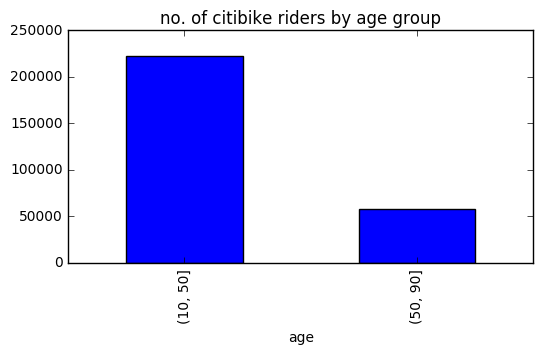

In [650]:
# absolute count of 2 age groups
bins = np.arange(10, 91, 40)
ax = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
ax.set_title("no. of citibike riders by age group")

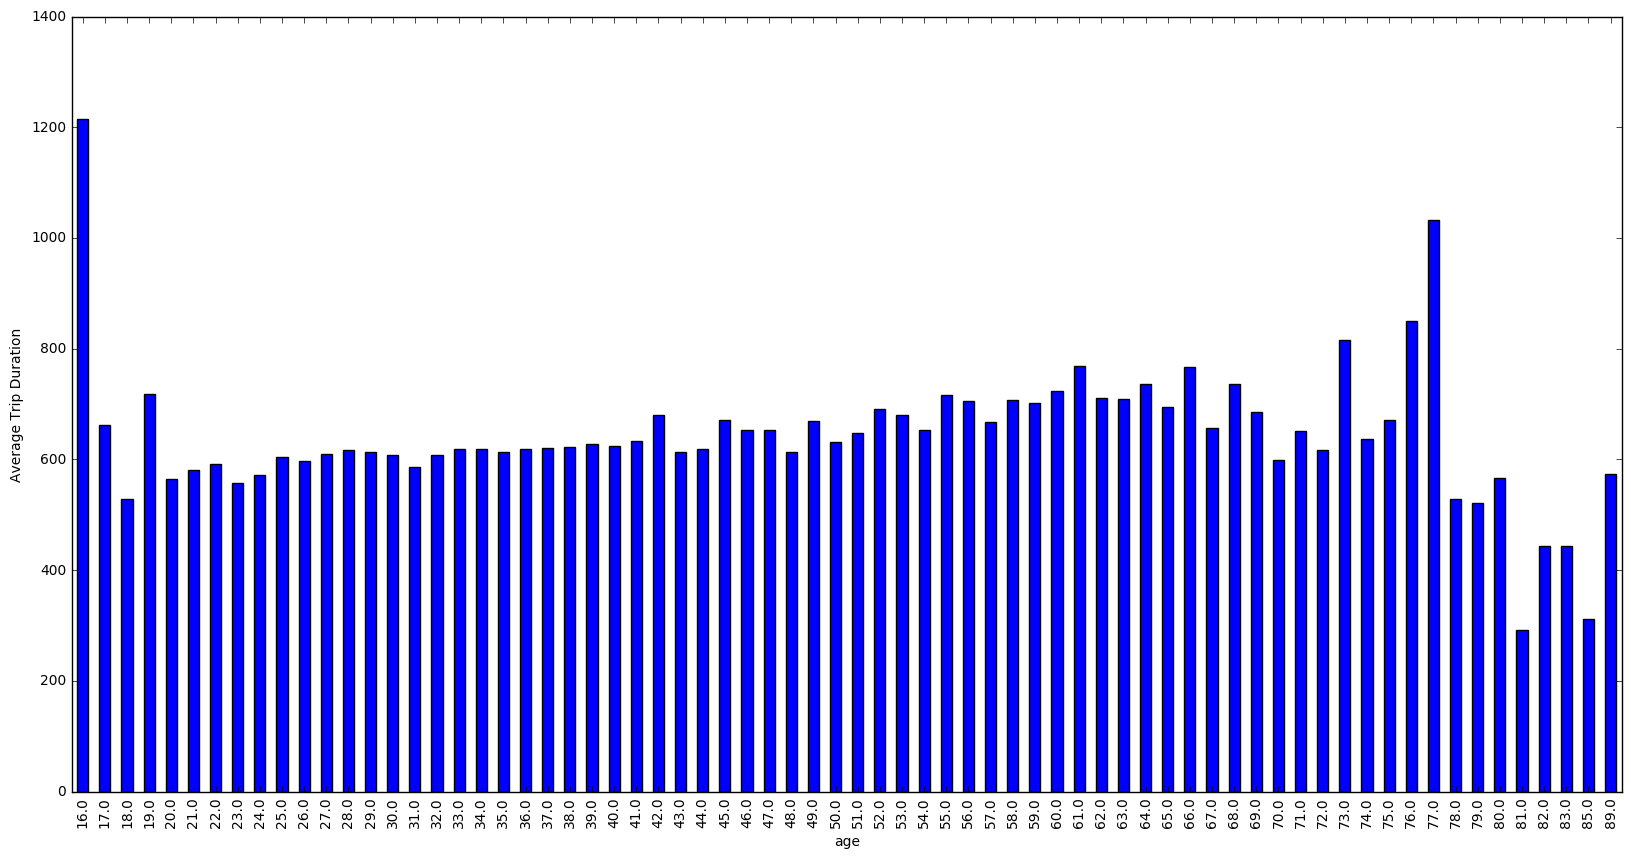

In [652]:
fig = pl.figure(figsize(20,10))
ax = df.tripduration.groupby(df.age).mean().plot(kind='bar', legend=False)
ax.set_ylabel ("Average Trip Duration")

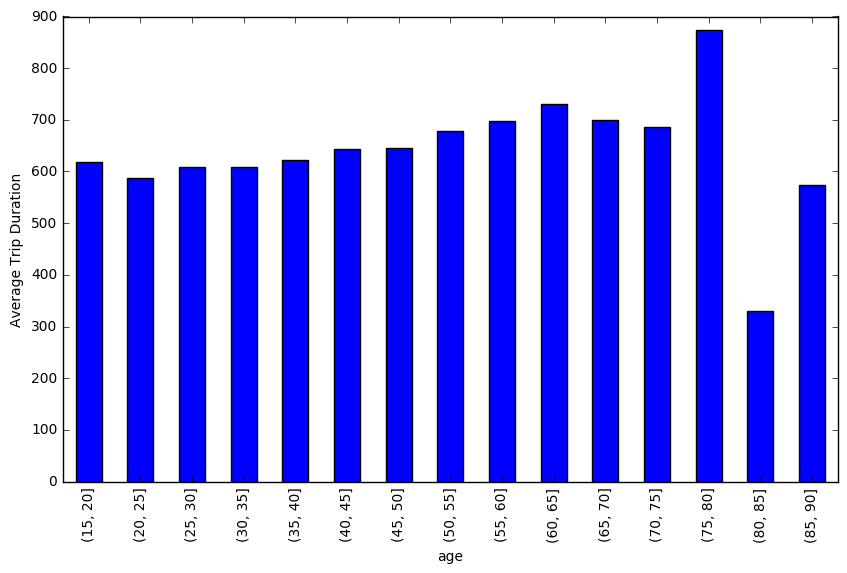

In [655]:
fig = pl.figure(figsize(10,6))
bins = np.arange(15, 91, 5)
ax = df.tripduration.groupby(pd.cut(df.age, bins)).mean().plot(kind='bar', legend=False)
ax.set_ylabel ("Average Trip Duration")

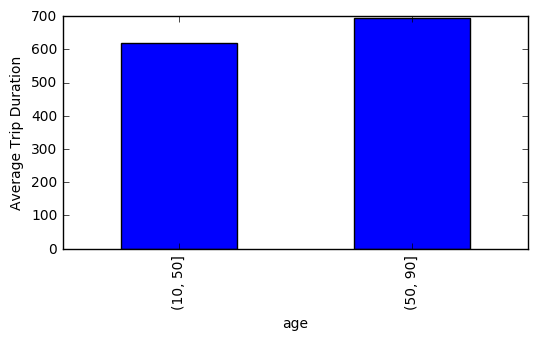

In [583]:
fig = pl.figure(figsize(6,3))
bins = np.arange(10, 91, 40)
ax = df.tripduration.groupby(pd.cut(df.age, bins)).mean().plot(kind='bar', legend=False)
ax.set_ylabel ("Average Trip Duration")

## Now observe some important statistical results of the two sample

In [584]:
df.tripduration.groupby(pd.cut(df.age, bins)).mean()

age
(10, 50]    620.030794
(50, 90]    694.502358
Name: tripduration, dtype: float64

## The mean of Trip Duration does not differ much between age groups. This means that we cannot reject the Null Hypothesis.
## Nevertheless, I want to know whether the younger and the elder differ in the amount of time they spending riding citibikes. Let's do t-test to find out.

In [585]:
df.tripduration.groupby(pd.cut(df.age, bins)).std()

age
(10, 50]    853.242638
(50, 90]    827.525830
Name: tripduration, dtype: float64

In [586]:
df.tripduration.groupby(pd.cut(df.age, bins)).var()

age
(10, 50]    728023
(50, 90]    684799
Name: tripduration, dtype: int64

## T-test

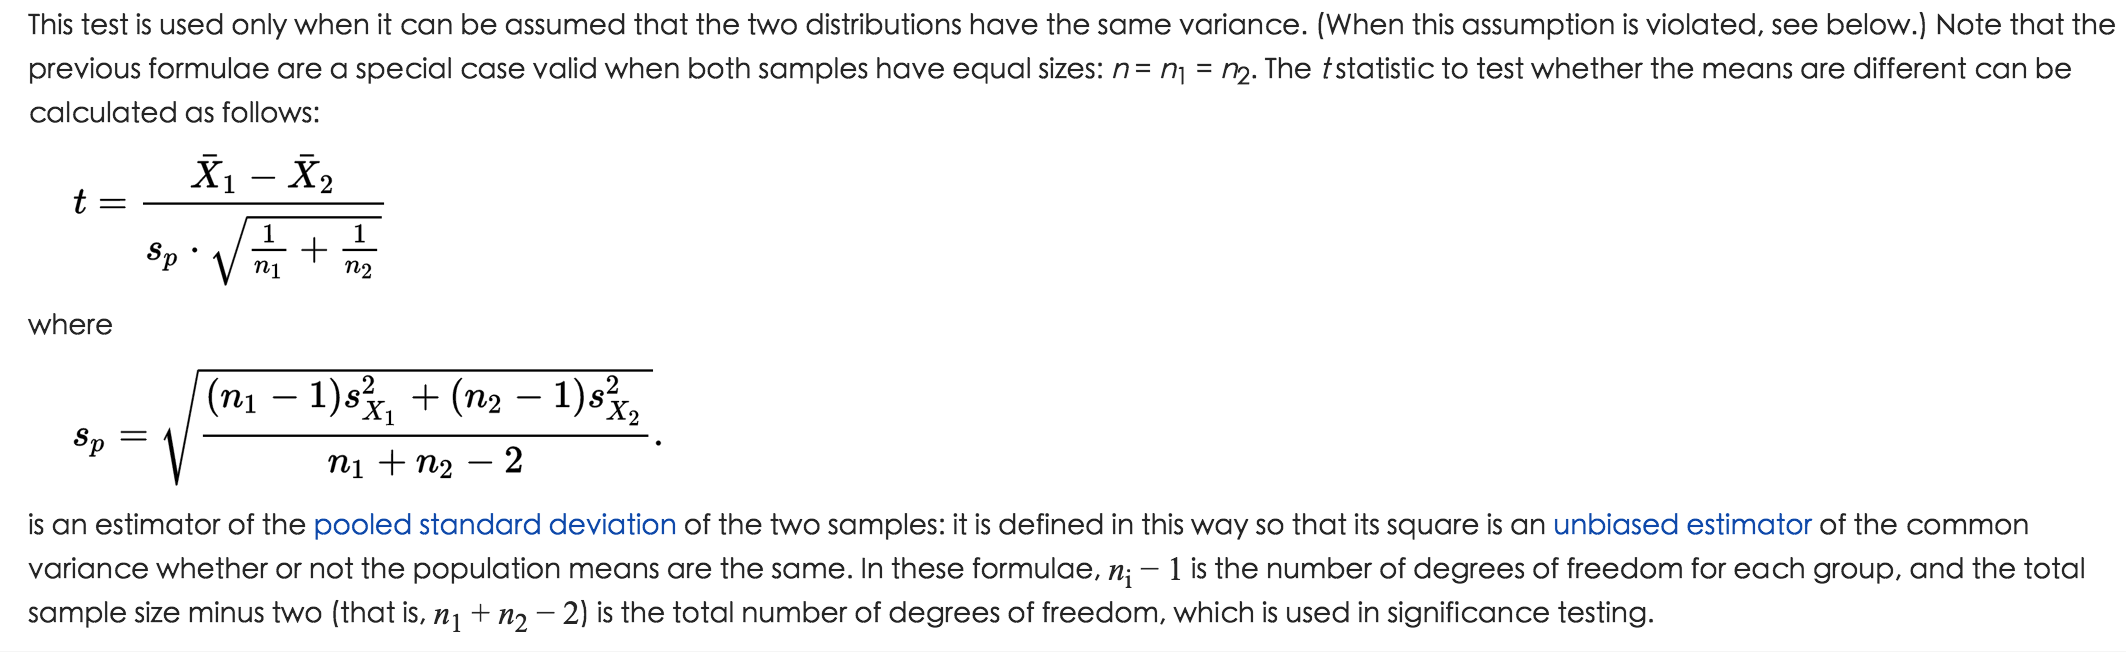

In [658]:
import scipy.stats
from IPython.display import Image
Image(filename='/home/cusp/zn352/PUI2016_zn352/t-test.png')

In [590]:
TripDuration_y = df.tripduration[df.age <= 50]
TripDuration_o = df.tripduration[df.age > 50]

In [592]:
mean_y = TripDuration_y.mean()
mean_o = TripDuration_o.mean()

In [593]:
s_y = TripDuration_y.var()
s_o = TripDuration_o.var()

In [594]:
n1 = len(TripDuration_y)
n2 = len(TripDuration_o)

In [638]:
s_pooled = ((n1-1)*(s_y**2) + (n2-1)*(s_o**2))/(n1+n2-2)

In [639]:
t = (mean_y-mean_o)/sqrt(s_pooled*((1/n1)+(1/n2)))

In [640]:
t

-0.022123182876913925

## t-test is very close to 0. And because H0 < 0, it is -0.02. 

## I tried to calculate t-test using scipy package - 

### selected 20 samples for each group

In [637]:
scipy.stats.ttest_ind(TripDuration_y[::12000],TripDuration_o[::3000])

Ttest_indResult(statistic=-1.7684885743480914, pvalue=0.085223776488815239)

### t-test result is smaller than t-test distribution table suggests with df > 20, and p-value is less than alpha = 0.05. There's no significant difference between younger and elder people's trip duration of citibike usage. 

### I ran test on another data sample (201605), the results were similar - no significant difference. 